<a href="https://colab.research.google.com/github/Calebcarp/CS290/blob/main/Obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files



In [ ]:
files.upload()


{}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [6]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [7]:
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [8]:
! kaggle competitions download -c 'ObesityDataSet_raw_and_data_sinthetic'



Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [9]:
!kaggle datasets download -d fatemehmehrparvar/obesity-levels

Dataset URL: https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/57.6k [00:00<?, ?B/s]
100% 57.6k/57.6k [00:00<00:00, 6.83MB/s]


In [10]:
import zipfile

In [11]:
zip_ref = zipfile.ZipFile('obesity-levels.zip', 'r')

In [12]:
zip_ref.extractall('/content')

In [13]:
zip_ref.close()

In [14]:
import os
os.listdir('/content')

['.config',
 'obesity-levels.zip',
 'ObesityDataSet_raw_and_data_sinthetic.csv',
 'sample_data']

In [15]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [16]:
df = pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")

In [17]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [18]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [49]:
df.nunique()

,0
Age,1402
Gender,2
Height,1574
Weight,1525
family_history_with_overweight,2
FAVC,2
FCVC,810
NCP,635
CAEC,4
SMOKE,2


In [19]:
train_set, test_set = train_test_split(df, test_size=0.2)


In [20]:
train_set.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [21]:
print(df.columns)


Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [22]:
train_set = train_set[["Age", "Gender", "Height", "Weight", "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", "MTRANS", "NObeyesdad"]]

In [23]:
test_set = test_set[["Age", "Gender", "Height", "Weight", "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", "MTRANS", "NObeyesdad"]]

In [24]:
X_train = train_set[["Age", "Gender", "Height", "Weight", "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", "MTRANS"]]
y_train = train_set["NObeyesdad"]

In [25]:
X_test = test_set[["Age", "Gender", "Height", "Weight", "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", "MTRANS"]]
y_test = test_set["NObeyesdad"]

In [26]:
num_attributes = X_train.select_dtypes( include = ['int64','float64']).columns
cat_attributes = X_train.select_dtypes( include = ['object']).columns

In [27]:
trf = [ ('num', StandardScaler(), num_attributes),
       ('cat', OneHotEncoder( handle_unknown='ignore'), cat_attributes) ]
col_transform = ColumnTransformer( transformers = trf )

In [28]:
pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeClassifier(max_depth=3))])

In [29]:
cross_val_score( pipeline, X_train, y_train, cv=5, scoring='accuracy')

array([0.62130178, 0.61538462, 0.61242604, 0.64688427, 0.61424332])

In [30]:
model = pipeline.fit( X_train, y_train )
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object'))])),
                ('clf', DecisionTreeClassifier(max_depth=3))])

In [31]:
predictions = pipeline.predict( X_test )

In [32]:
cm = confusion_matrix( y_test, predictions )

In [33]:
cm


array([[40, 22,  0,  0,  0,  1,  0],
       [ 5, 17,  6,  0,  0, 16,  0],
       [ 0,  0, 63,  9,  0,  1,  0],
       [ 0,  0,  5, 51,  0,  0,  0],
       [ 0,  0,  0,  0, 64,  0,  0],
       [ 0,  3, 22,  0,  0, 36,  0],
       [ 0,  1, 52,  1,  0,  8,  0]])

In [96]:
from sklearn.metrics import confusion_matrix, classification_report

In [99]:
report = classification_report(y_test, predictions)
print(report)

                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.63      0.74        63
      Normal_Weight       0.40      0.39      0.39        44
     Obesity_Type_I       0.43      0.86      0.57        73
    Obesity_Type_II       0.84      0.91      0.87        56
   Obesity_Type_III       1.00      1.00      1.00        64
 Overweight_Level_I       0.58      0.59      0.59        61
Overweight_Level_II       0.00      0.00      0.00        62

           accuracy                           0.64       423
          macro avg       0.59      0.63      0.59       423
       weighted avg       0.59      0.64      0.60       423



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5, 0.875, 'x[2] <= 0.49\ngini = 0.856\nsamples = 1688\nvalue = [209, 243, 278, 241, 260, 229, 228]'),
 Text(0.25, 0.625, 'x[2] <= -1.018\ngini = 0.801\nsamples = 1106\nvalue = [209, 243, 196, 5, 0, 229, 224]'),
 Text(0.125, 0.375, 'x[1] <= -0.453\ngini = 0.489\nsamples = 332\nvalue = [204, 121, 0, 0, 0, 7, 0]'),
 Text(0.0625, 0.125, 'gini = 0.518\nsamples = 180\nvalue = [69, 104, 0, 0, 0, 7, 0]'),
 Text(0.1875, 0.125, 'gini = 0.199\nsamples = 152\nvalue = [135, 17, 0, 0, 0, 0, 0]'),
 Text(0.375, 0.375, 'x[2] <= -0.407\ngini = 0.745\nsamples = 774\nvalue = [5, 122, 196, 5, 0, 222, 224]'),
 Text(0.3125, 0.125, 'gini = 0.618\nsamples = 294\nvalue = [5, 110, 3, 0, 0, 140, 36]'),
 Text(0.4375, 0.125, 'gini = 0.655\nsamples = 480\nvalue = [0, 12, 193, 5, 0, 82, 188]'),
 Text(0.75, 0.625, 'x[8] <= 0.5\ngini = 0.616\nsamples = 582\nvalue = [0, 0, 82, 236, 260, 0, 4]'),
 Text(0.625, 0.375, 'x[0] <= -0.282\ngini = 0.402\nsamples = 322\nvalue = [0, 0, 82, 235, 1, 0, 4]'),
 Text(0.5625, 0.

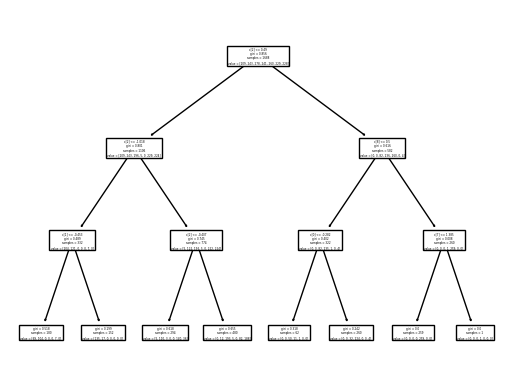

In [34]:
plot_tree( pipeline.named_steps['clf'])

In [35]:
X = df[["Age", "Gender", "Height", "Weight", "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", "MTRANS"]]
y = df["NObeyesdad"]

In [36]:

df = pd.concat( [X,y], axis=1 )
df.head()

,Age,Gender,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [37]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [38]:
features = df.columns[ df.columns != "NObeyesdad" ]
features

Index(['Age', 'Gender', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')

In [77]:
target = "NObeyesdad"
attribute = "Weight"

In [78]:

vals = df[ attribute].unique()
vals

array([ 64.      ,  56.      ,  77.      , ..., 133.689352, 133.346641,
       133.472641])

In [79]:
props = df[ df[attribute] == vals[8] ][target].value_counts( normalize=True )
props

,proportion
NObeyesdad,
Obesity_Type_I,1.0


In [80]:
entropy = 0
overall = len( df )
for val in vals:
  subset_size = len(df[ df[attribute] == val ])
  weight = subset_size / overall
  props = df[ df[attribute] == val ][target].value_counts( normalize=True )
  for p in props.array:
    entropy =  entropy - weight*(p*math.log2(p))

entropy

0.2990787815380819

In [56]:
def Attribute_selection_method(df, target_variable, method):
    if method not in ["entropy", "gini"]:
        raise ValueError("Method must be 'entropy' or 'gini'")

    attributes = df.columns[df.columns != target_variable]
    results = {}

    for attribute in attributes:
        vals = df[attribute].unique()
        overall = len(df)

        if method == "entropy":
            entropy = 0
            for val in vals:
                subset = df[df[attribute] == val]
                subset_size = len(subset)
                weight = subset_size / overall
                props = subset[target_variable].value_counts(normalize=True)
                for p in props:
                    entropy -= weight * (p * math.log2(p)) if p > 0 else 0
            results[attribute] = entropy

        elif method == "gini":
            gini = 0
            for val in vals:
                subset = df[df[attribute] == val]
                subset_size = len(subset)
                weight = subset_size / overall
                props = subset[target_variable].value_counts(normalize=True)
                gini_index = 1 - sum(p**2 for p in props)
                gini += weight * gini_index
            results[attribute] = gini

    return results

In [57]:
df = pd.concat([X, y], axis=1)

In [81]:
target_variable = "NObeyesdad"

In [59]:
method = "entropy"  # or "gini"

In [60]:
result = Attribute_selection_method(df, target_variable, method)

In [76]:
result

{'Age': 0.5814841370646545,
 'Gender': 2.5044125564614634,
 'Height': 0.436886548748298,
 'Weight': 0.2990787815380819,
 'family_history_with_overweight': 2.5725180825838123,
 'FAVC': 2.7162703744795667,
 'FCVC': 1.3668296144785934,
 'NCP': 1.812636531560182,
 'CAEC': 2.570886497628783,
 'SMOKE': 2.7917594754611517,
 'CH2O': 0.9408900086006559,
 'SCC': 2.756710241881567,
 'FAF': 1.014992664983191,
 'TUE': 1.1251074474207825,
 'CALC': 2.656007768500646,
 'MTRANS': 2.6915086160568036}

In [64]:
smallest_attribute = min(result, key=result.get)
smallest_value = result[smallest_attribute]

In [68]:
smallest_attribute
smallest_value

0.2990787815380819

In [75]:
print(f"Smallest entropy is from '{smallest_attribute}': {smallest_value}")

Smallest entropy is from 'Weight': 0.2990787815380819
